# Semi-Supervised VAE Project

## By VAEGen

### Imports

In [9]:
from plotting import plot_64, plot_64_m2, plot_loss_m1 ,plot_loss_m2, plot_interpolation_m1, plot_interpolation_m2
from models import VAE, M1, M2
from training import run_epochs
from datasets import importMNIST, importFashionMNIST
from loaders import create_loader, create_subset
from classifiers import kneighbors_classifier, linearregression_classifier
import torch

In [10]:
## Settings
batch_size = 512
epochs = 50
latent_dim = 8
learning_rate = 1e-3
image_channels = 1
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
NNprint_ = False
classes = [0,1,2,3,4,5,6,7,8,9]
num_classes = len(classes)

In [11]:
## Initial Values
model = None
dset_train = None
dset_test = None
train_loss = []
train_acc = []
test_loss = []
test_acc = []

In [12]:
## Picking mode and dataset
mode = input("Pick mode? (vae/m1/m2) ")
dataset = input("Pick dataset (mnist/fashion) ")

Pick mode? (vae/m1/m2) m1
Pick dataset (mnist/fashion) mnist


In [13]:
if dataset == "mnist":
    dset_train, dset_test = importMNIST()
elif dataset == "fashion":
    dset_train, dset_test = importFashionMNIST()
else:
    print("Unknown dataset")
    exit()

In [14]:
## Creating Loaders
train_loader = create_loader(dset_train,batch_size)
test_loader = create_loader(dset_test,batch_size)
print(device)

cuda


Epoch 1 of 50
	 Training ...


/home/slangen/Documents/deep/lib/python3.6/site-packages/torch/nn/_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


	 Testing ...
Train ELBO: -214.2124
Val ELBO: -152.6538
Epoch 2 of 50
	 Training ...
	 Testing ...
Train ELBO: -126.0114
Val ELBO: -104.6311
Epoch 3 of 50
	 Training ...
	 Testing ...
Train ELBO: -103.3326
Val ELBO: -92.4981
Epoch 4 of 50
	 Training ...
	 Testing ...
Train ELBO: -96.4003
Val ELBO: -90.8194
Epoch 5 of 50
	 Training ...
	 Testing ...
Train ELBO: -93.1118
Val ELBO: -89.2509
Epoch 6 of 50
	 Training ...
	 Testing ...
Train ELBO: -91.0231
Val ELBO: -85.8050
Epoch 7 of 50
	 Training ...
	 Testing ...
Train ELBO: -89.3529
Val ELBO: -85.0516
Epoch 8 of 50
	 Training ...
	 Testing ...
Train ELBO: -88.0087
Val ELBO: -85.0348
Epoch 9 of 50
	 Training ...
	 Testing ...
Train ELBO: -86.9313
Val ELBO: -83.1170
Epoch 10 of 50
	 Training ...
	 Testing ...
Train ELBO: -86.0370
Val ELBO: -82.0277
Epoch 11 of 50
	 Training ...
	 Testing ...
Train ELBO: -85.1734
Val ELBO: -82.0984
Epoch 12 of 50
	 Training ...
	 Testing ...
Train ELBO: -84.4531
Val ELBO: -81.2866
Epoch 13 of 50
	 Training

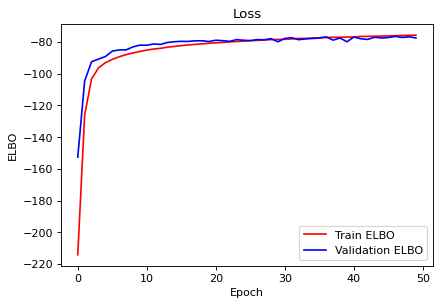

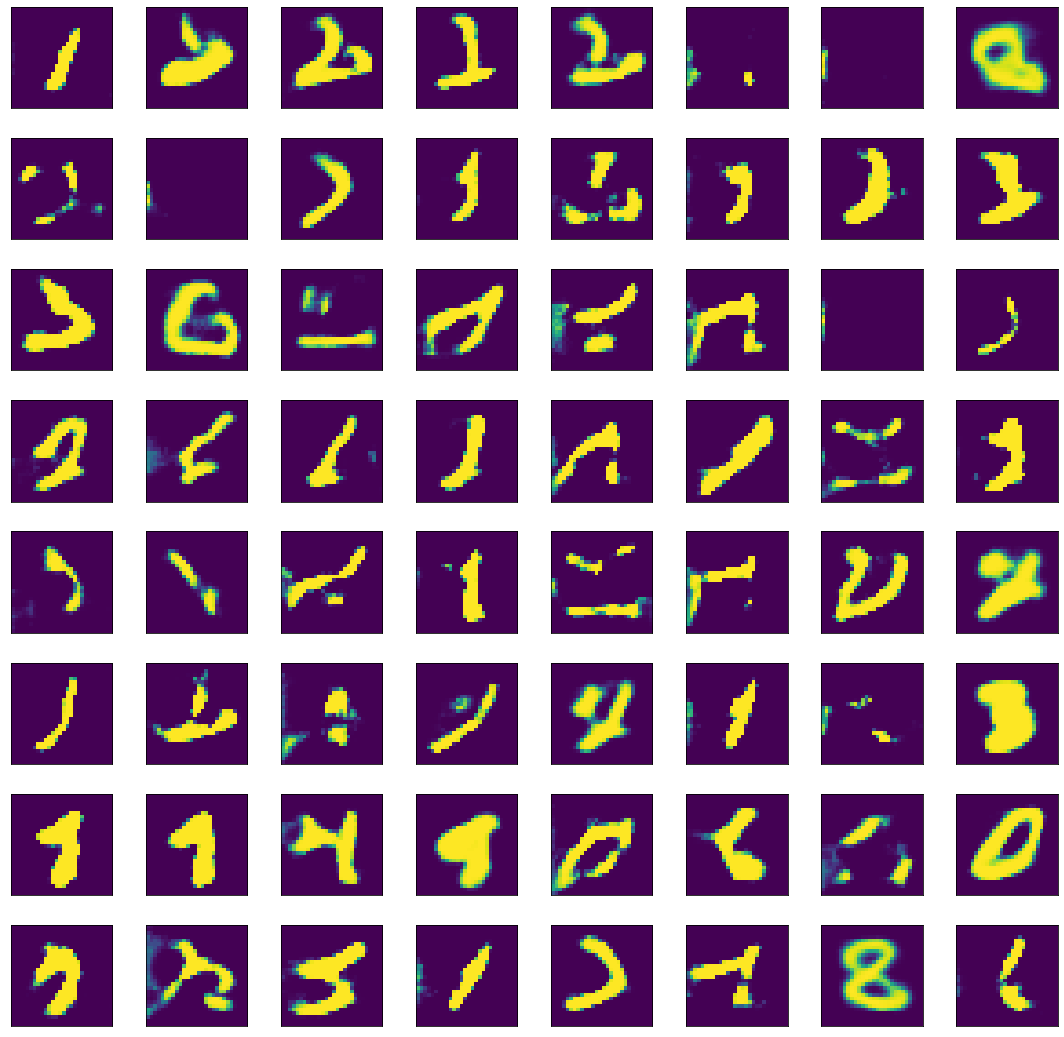

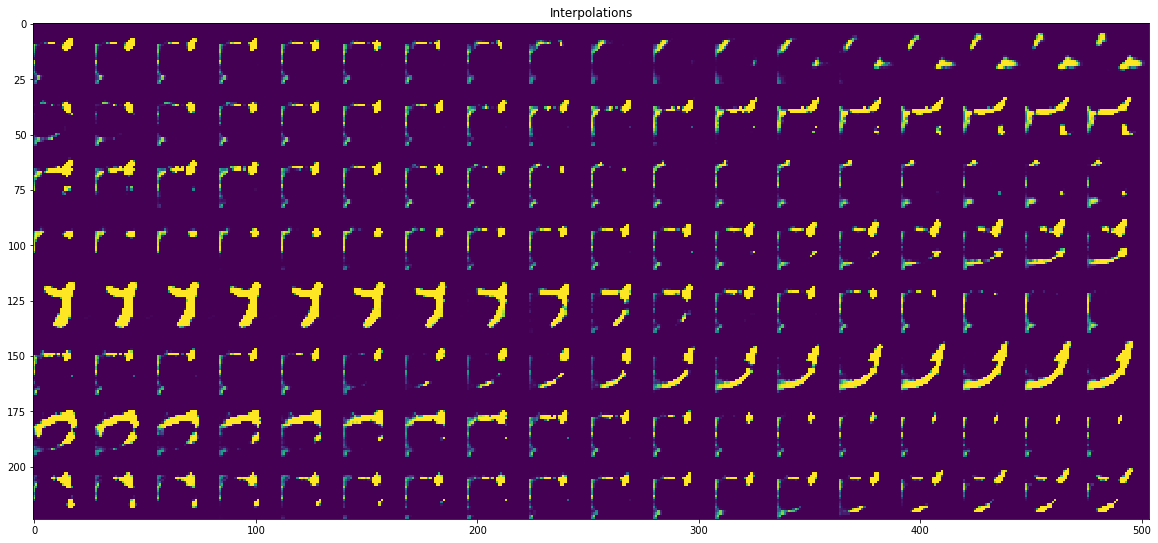

Mean acc (train):  0.91
Mean acc (test):  0.76


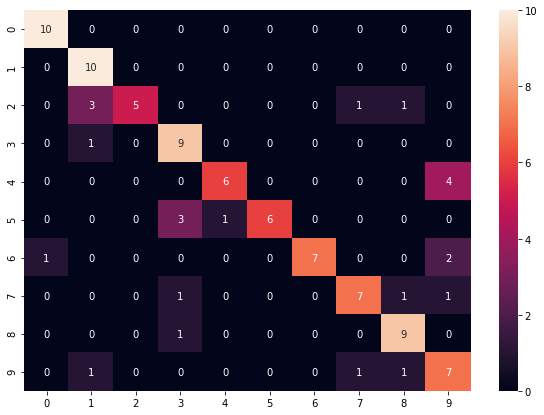

/home/slangen/Documents/deep/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Mean acc (train):  1.0
Mean acc (test):  0.83


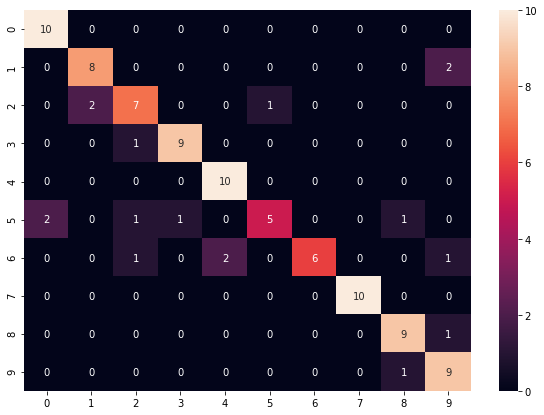

In [15]:
if mode=="vae":
    # define model and optimizer
    model = VAE(model, image_channels=image_channels,h_dim=1024,z_dim=8).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

    # Sample before training
    plot_64(model=model, sample=True)

    # Train network
    run_epochs(mode, model, optimizer, epochs, train_loader, test_loader)

    # Sample after training
    plot_examples(model=model, sample=True)

elif mode=="m1":
    # define model and optimizer
    model = M1(device, image_channels=1, h_dim=1024, z_dim=latent_dim).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    # train network
    train_loss,test_loss = run_epochs(mode, model, optimizer, epochs, train_loader, test_loader, train_loss, test_loss)

    # plot loss
    plot_loss_m1(train_loss,test_loss)

    # plot reconstructions
    plot_64(model=model,sample=True)

    # sample model and plot interpolations
    z_in=model.sample(batch_size=10000,z_out=True)
    plot_interpolation_m1(model, z_in=z_in,image_n=0,latent_dim=latent_dim,imsize=28,interpolate_dim=18,std_=3,batch_size=10000)

    # classifier
    kneighbors_classifier(model,dset_train, dset_test, classes)
    linearregression_classifier(model,dset_train, dset_test, classes)


elif mode=="m2":
    # define model and optimizer
    model = M2(device, image_channels=image_channels, h_dim=1024, z_dim=latent_dim, num_labels=num_classes).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    # train network
    train_loss, test_loss, train_acc, test_acc = run_epochs(mode, model, optimizer, epochs, train_loader, test_loader, train_loss, test_loss, train_acc, test_acc)
    # plot loss
    plot_loss_m2(train_loss,test_loss, train_acc, test_acc)

    # plot reconstructions
    plot_64_m2(model=model, sample=True, y=(torch.ones(64).type(torch.int64)*9))

    # confusion_matrixes
    print("Mean acc (train): ", train_acc[-1])
    make_cm(model, dset_train)
    print("Mean acc (val): ", test_acc[-1])
    make_cm(model, dset_test)

    # sample model and plot interpolations
    z_in = model.sample(y=torch.Tensor([0,1,2,3,4,5,6,7,8,9]).type(torch.int64))["z"]
    plot_interpolation_m2(model, z_in=z_in,image_n=0,latent_dim=latent_dim,imsize=28,interpolate_dim=18,std_=5,batch_size=10000)